In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense, Flatten,Conv2D, MaxPool2D
from keras.models import Model
from keras.preprocessing import image
import cv2
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models  import Sequential
import splitfolders
from zipfile import ZipFile
from google.colab import files
from IPython.display import Image
import os.path

I imported the needed liberies of Keras API. They are some layers, functions to split folders that i can split the data for train and testing. To open zip fil, zipfile. 

In [ ]:
file_name="Sinfdoshlarim.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


Here, I just unzipped the data with the help of ZipFle function. And once it is done, it prints out "Done".

In [ ]:
input="/content/Sinfdoshlarim"
output="/content/friends_divided"
splitfolders.ratio(input,output,seed=42,ratio=(.8,.2,))

Copying files: 78 files [00:00, 1885.00 files/s]


Here, I gave links for getting the data and exporting the splited data. It takes images from input link and split it with 0.2 ratio. Then gives to the output link location.

In [ ]:
train_path='/content/sinfdoshlarim_bolingan/train'
valid_path='/content/sinfdoshlarim_bolingan/val'
img_size=[200,200]

Here I gave links for the train and validation data. I wanted to make the image size as 200x200. So here it is.

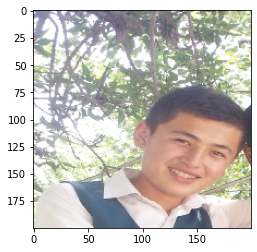

In [ ]:
mallavoy=image.load_img('/content/Sinfdoshlarim/Abdusalom/19700102_061452.jpg',target_size=img_size)
plt.imshow(mallavoy)
plt.show()

I used image libery and load_img function to load a sample image of one class.

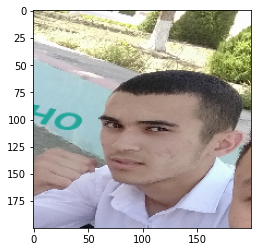

In [ ]:
jamjid=image.load_img('/content/Sinfdoshlarim/Jamshid/20190518_232838.jpg',target_size=img_size)
plt.imshow(jamjid)
plt.show()

I did the same thing as above.

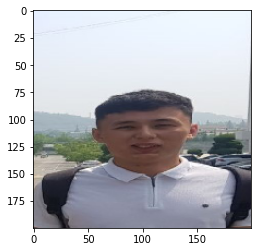

In [ ]:
kamina=image.load_img('/content/Sinfdoshlarim/Men/photo_2020-07-27_05-42-14.jpg',target_size=img_size)
plt.imshow(kamina)
plt.show()

Here the third class image who is me.

In [ ]:
train=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.10,
                         height_shift_range=0.10,
                         rescale=1/255,
                         shear_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,)
                         
validation=ImageDataGenerator(rotation_range=20,
                         width_shift_range=0.10,
                         height_shift_range=0.10,
                         rescale=1/255,
                         shear_range=0.1,
                         zoom_range=0.1,
                         horizontal_flip=True,
                         fill_mode='nearest')

Here what I did is called Image Augmantation. Images can be in differect shape and condition, some might be scaled, some might be shifted to the left or right. So the model might get confused once it gets new image. To solve the problem, we will shift scale or do some edtings to the images and generate new images to train with the batchh size. So it only works with cnn, not ANN or any other staff.
     I scaled the images 255 times by 1/255 to make it easy for the model to work with images. And rotation so on ...

In [ ]:
train_data=train.flow_from_directory(train_path,
                                     target_size=img_size,
                                     batch_size=8,
                                     class_mode='categorical')

validation_data=validation.flow_from_directory(train_path,
                                     target_size=img_size,
                                     batch_size=4,
                                     class_mode='categorical')

Found 61 images belonging to 3 classes.
Found 61 images belonging to 3 classes.


"flow_from_directory" this function takes images from the given links and give them certain classes according to the files they are in. So target size or classes can be given here. Like categorical if there are more than 2 classes. And the batch size is for generating new images. Target_size is just the size of images derived from the link

In [ ]:
train_data.class_indices

{'Abdusalom': 0, 'Jamshid': 1, 'Men': 2}

To see image classes and their names, just wrote that function.

In [ ]:
validation_data.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

looking at the indices of the classes

In [ ]:
model=Sequential([Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Conv2D(64,(3,3),activation='relu',input_shape=(200,200,3)),
                  MaxPool2D(2,2),

                  Flatten(),
                  Dense(16,activation='relu'),
                  Dense(32,activation='relu'),
                  Dense(64,activation='relu'),
                  
                  Dense(3,activation='softmax')
                  ])

   Wow, here it is I made my model here using Sequential API. I used Convolutional layer with the karnel size3 by 3, activation function is "Relu", The shape model accepts is input shape, then there is MaxPooling with 2 by 2. I know what they do deeply, but they are all deep math. Activation for example is a graph of out predictions. convolution is multiplication of mask to the image. Pooling is decreasing the image for the model. So I repeated it 3 times. 
     Then I flattened the images into a single list. So then I added 3 Dense layers with 16,32,64 neurons. At the end the output layer got 3 neurons as i have 3 classes only. Here the output comes from the last dense layer with the activation "Softmax" as we have more classes.

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compiling the model, we will enable the loss type according to the number of classes. In order to decrease the loss, we need optimizers, so I chose"adam" as it is the best for any model. Metrics is the evaluating type, so just accuracy.

In [ ]:
r=model.fit(train_data,validation_data=validation_data,epochs=100)

Epoch 1/100
11/11 [==============================] - 6s 539ms/step - loss: 0.8989 - accuracy: 0.6393 - val_loss: 0.7562 - val_accuracy: 0.6721
Epoch 2/100
11/11 [==============================] - 6s 534ms/step - loss: 0.8495 - accuracy: 0.6557 - val_loss: 0.7309 - val_accuracy: 0.6721
Epoch 3/100
11/11 [==============================] - 6s 532ms/step - loss: 0.8001 - accuracy: 0.6557 - val_loss: 0.7542 - val_accuracy: 0.6066
Epoch 4/100
11/11 [==============================] - 6s 549ms/step - loss: 0.7488 - accuracy: 0.7049 - val_loss: 0.7095 - val_accuracy: 0.7377
Epoch 5/100
11/11 [==============================] - 9s 929ms/step - loss: 0.7155 - accuracy: 0.7377 - val_loss: 0.7009 - val_accuracy: 0.7541
Epoch 6/100
11/11 [==============================] - 7s 649ms/step - loss: 0.7584 - accuracy: 0.6885 - val_loss: 0.7761 - val_accuracy: 0.6885
Epoch 7/100
11/11 [==============================] - 7s 661ms/step - loss: 0.7649 - accuracy: 0.7213 - val_loss: 0.7206 - val_accuracy: 0.7049

we are fitting the model with 100 epochs that our model learns the images 100 times. The reult was good, 83 for train and 80 for testing. So no overfitting or underfitting. It is fitting well.

In [ ]:
if os.path.isfile('/content/Sinfdoshlarim/sinfdoshlarim.h5') is False:
  model.save('/content/Sinfdoshlarim/sinfdoshlarim.h5')

It is saving the trained model, so i am saving it as h5 file with its weights.

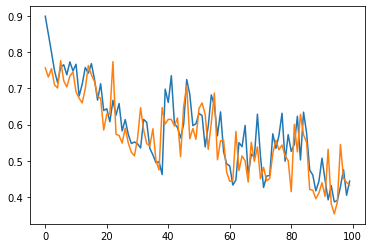

In [ ]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.show()


A code for the visulazation of train and validation losss. 

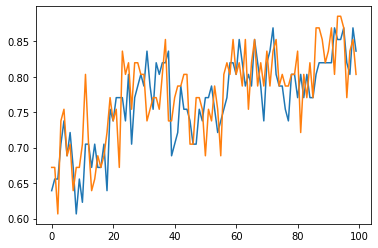

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.show()

A code for the visulazation of train and validation accuracy. As you can see by epoch, it increases as the loss decreases. 

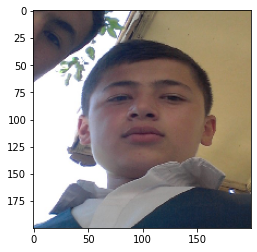

Bu Mallavoy


In [ ]:
image_path='/content/mixed/19700102_110010.jpg'
img_plot=image.load_img(image_path,target_size=(200,200))
plt.imshow(img_plot)
plt.show()

X=image.img_to_array(img_plot)
X=np.expand_dims(X,axis=0)
test=model.predict(X)
if np.argmax(test)==1:
  print('Jamshid.')
elif np.argmax(test)==0:
  print("Abdusalom")
elif np.argmax(test)==0:
  print("Muhammadyusuf")

It is like testing process, I got the image and loaded first. Then I corrected its size and dimentions, then gave to the prediction. So as the model gives an array, i just took its argmax to know which image has more probability.. Then, it is simple if else.